# Pulling Data

Use three months of data from Seattle, Oakland, and Louisville
- start date of "2022-09-01"
- end date of "2022-12-01"

In [1]:
from cdp_data import CDPInstances, datasets
import pandas as pd

In [2]:
# Get a dataset of "city council sessions" for Seattle 2022-09-01 to 2022-12-01
seattle_transcripts_sep_2022_to_dec_2022 = datasets.get_session_dataset(
    CDPInstances.Seattle,  # specify the city (or county) council we want data from
    start_datetime="2022-09-01",  # YYYY-MM-DD format
    end_datetime="2022-12-01",  # YYYY-MM-DD format
    store_transcript=True,  # store transcripts locally for fast file reading
    store_transcript_as_csv=True,  # store transcripts as CSVs for easy pandas reading
)

# Get a dataset of "city council sessions" for Oakland 2022-09-01 to 2022-12-01
oakland_transcripts_sep_2022_to_dec_2022 = datasets.get_session_dataset(
    CDPInstances.Oakland,  # specify the city (or county) council we want data from
    start_datetime="2022-09-01",  # YYYY-MM-DD format
    end_datetime="2022-12-01",  # YYYY-MM-DD format
    store_transcript=True,  # store transcripts locally for fast file reading
    store_transcript_as_csv=True,  # store transcripts as CSVs for easy pandas reading
)

# Get a dataset of "city council sessions" for Louisville 2022-09-01 to 2022-12-01
louisville_transcripts_sep_2022_to_dec_2022 = datasets.get_session_dataset(
    CDPInstances.Louisville,  # specify the city (or county) council we want data from
    start_datetime="2022-09-01",  # YYYY-MM-DD format
    end_datetime="2022-12-01",  # YYYY-MM-DD format
    store_transcript=True,  # store transcripts locally for fast file reading
    store_transcript_as_csv=True,  # store transcripts as CSVs for easy pandas reading
)

Fetching each model attached to event_ref:   0%|          | 0/17 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/17 [00:00<?, ?it/s]

Converting and storing each transcript as a CSV: 17it [00:08,  2.00it/s]


Fetching each model attached to event_ref:   0%|          | 0/18 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/18 [00:00<?, ?it/s]

Converting and storing each transcript as a CSV: 18it [00:09,  1.94it/s]


Fetching each model attached to event_ref:   0%|          | 0/77 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/77 [00:00<?, ?it/s]

Converting and storing each transcript as a CSV: 77it [00:32,  2.35it/s]


# Recognizing NERs using SpaCy and some data processing

Named entity types:
- "PERSON": "People, including fictional"
- "ORG": "Companies, agencies, institutions, etc."
- "NORP": "Nationalities or religious or political groups"

Use the label "PERSON" to identify people references, "ORG" to identify organization references, and "NORP" to identify special interest groups references.

Filter out sentences that have missing values by dropping rows where the 'text' column is NaN.

In [3]:
import spacy 

nlp_spacy = spacy.load("en_core_web_sm")

# The NERs we are interested in
ners = ['PERSON', 'ORG', 'NORP']

### Seattle 

`seattle_sentences_session_df` contains all sentence data across all sessions in Seattle.

`seattle_df` contains all recognized entities from all sentence data across all sessions in Seattle.

In [4]:
seattle_rows = []
seattle_sentences_session_df = {}

for i, session in seattle_transcripts_sep_2022_to_dec_2022.iterrows():
    
    seattle_sentences_df = pd.read_csv(session.transcript_as_csv_path)
    # drop rows if text column is empty
    seattle_sentences_df = seattle_sentences_df.dropna(subset=["text"]).reset_index()
    
    # to keep session_id information associated with each sentence,
    # create another dataframe with session_id column
    seattle_sentences_session_df[session.transcript_as_csv_path] = seattle_sentences_df.assign(session_id = session.id)
    
    
    for t in seattle_sentences_df.index:
        doc = nlp_spacy(seattle_sentences_df.text[t])
        for ent in doc.ents:
            if ent.label_ in ners:
                seattle_rows.append([session.id, t, ent.label_, ent.text, 'Seattle'])
    
            
seattle_df = pd.DataFrame(seattle_rows, columns=["session_id", "sentence_index", "named_entity_type", "entity", "city"])

### Oakland

`oakland_sentences_session_df` contains all sentence data across all sessions in Oakland.

`oakland_df` contains all recognized entities from all sentence data across all sessions in Oakland.

In [5]:
oakland_rows = []
oakland_sentences_session_df = {}

for i, session in oakland_transcripts_sep_2022_to_dec_2022.iterrows():
    
    oakland_sentences_df = pd.read_csv(session.transcript_as_csv_path)
    # drop rows if text column is empty
    oakland_sentences_df = oakland_sentences_df.dropna(subset=["text"]).reset_index()

    # to keep session_id information associated with each sentence, 
    # create another dataframe with session_id column
    oakland_sentences_session_df[session.transcript_as_csv_path] = oakland_sentences_df.assign(session_id = session.id)
        
    for t in oakland_sentences_df.index:
        doc = nlp_spacy(oakland_sentences_df.text[t])
        for ent in doc.ents:
            if ent.label_ in ners:
                oakland_rows.append([session.id, t, ent.label_, ent.text, 'Oakland'])


oakland_df = pd.DataFrame(oakland_rows, columns=["session_id", "sentence_index", "named_entity_type", "entity", "city"])

### Louisville

`louisville_sentences_session_df` contains all sentence data across all sessions in Louisville.

`louisville_df` contains all recognized entities from all sentence data across all sessions in Louisville.

In [6]:
louisville_rows = []
louisville_sentences_session_df = {}

for i, session in louisville_transcripts_sep_2022_to_dec_2022.iterrows():
    
    louisville_sentences_df = pd.read_csv(session.transcript_as_csv_path)
    # drop rows if text column is empty
    louisville_sentences_df = louisville_sentences_df.dropna(subset=["text"]).reset_index()
    
    # to keep session_id information associated with each sentence, 
    # create another dataframe with session_id column
    louisville_sentences_session_df[session.transcript_as_csv_path] = louisville_sentences_df.assign(session_id = session.id)

    for t in louisville_sentences_df.index:
        doc = nlp_spacy(louisville_sentences_df.text[t])
        for ent in doc.ents:
            if ent.label_ in ners:
                louisville_rows.append([session.id, t, ent.label_, ent.text, 'Louisville'])


louisville_df = pd.DataFrame(louisville_rows, columns=["session_id", "sentence_index", "named_entity_type", "entity", "city"])

# Combining all NER results and all sentence data

- Combined `seattle_df`, `oakland_df`, and `louisville_df` into 1 dataframe `all_cities_df`.

- Combined `seattle_sentences_session_df`, `oakland_sentences_session_df`, and `louisville_sentences_session_df` into 1 dataframe `all_cities_sentences_df`.


`all_cities_sentences_df` contains all sentences for all cities.

`all_cities_df` contains all NER results for all cities.

In [7]:
seattle_sentences_session_df = pd.concat(seattle_sentences_session_df)
oakland_sentences_session_df = pd.concat(oakland_sentences_session_df)
louisville_sentences_session_df = pd.concat(louisville_sentences_session_df)

all_cities_df = pd.concat([seattle_df, oakland_df, louisville_df])

all_cities_sentences_df = pd.concat([seattle_sentences_session_df, 
                                     oakland_sentences_session_df, 
                                     louisville_sentences_session_df])

# Normalization

To understand which part of the meeting the references appears, we normalized 'sentence_index' by:

- Dividing index by total number of sentences to get the percentage of meeting where sentence appears

- Adding a new column 'percentages' to `all_cities_df` indicating when an entity is recognized in the meeting.

In [8]:
# total_sentences_df stores the total_sentences for each session_id (for all cities)
total_sentences_df = all_cities_sentences_df.groupby(['session_id'])['index'].count().to_frame()
total_sentences_df = total_sentences_df.rename({"index": "total_sentences"}, axis=1)

total_sentences_df

,total_sentences
session_id,
00298c246cfe,270
01f258e3e7c9,592
044b13b7811a,391
09cc8bb18681,161
0b73859e8b6a,567
...,...
e9bdfa228805,128
ebf9ee5aaee3,1028
f19af512dd71,422


In [9]:
# add a new column to all_cities_df 'percentages' indicating when an entity is recognized in the meeting.
percentages = []
for i, row in all_cities_df.iterrows():  
    # Divide index by total number of sentences
    percentages.append(row['sentence_index']/total_sentences_df.loc[row.session_id]['total_sentences'])


all_cities_df["percentage"] = percentages 
all_cities_df

,session_id,sentence_index,named_entity_type,entity,city,percentage
0,76bba31aaf85,1,PERSON,Alex Pedersen,Seattle,0.001054
1,76bba31aaf85,7,PERSON,Councilmember Sawant,Seattle,0.007376
2,76bba31aaf85,13,PERSON,Greg Spotts,Seattle,0.013699
3,76bba31aaf85,13,ORG,Seattle transportation Department,Seattle,0.013699
4,76bba31aaf85,14,PERSON,Spotts,Seattle,0.014752
...,...,...,...,...,...,...
16584,3b14573b464b,2272,NORP,Asian,Louisville,0.990842
16585,3b14573b464b,2272,ORG,LBD,Louisville,0.990842
16586,3b14573b464b,2282,ORG,Committee,Louisville,0.995203
16587,3b14573b464b,2282,PERSON,Arthur,Louisville,0.995203


In [10]:
# exporting all_cities_df to a csv
# all_cities_df.to_csv('all_cities_data.csv')

In [11]:
all_cities_df = pd.read_csv('all_cities_data.csv')

# Plots

## A. When are Special Interest Groups (SIGs) referenced during meetings?

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from heapq import nlargest
import numpy as np

### histogram

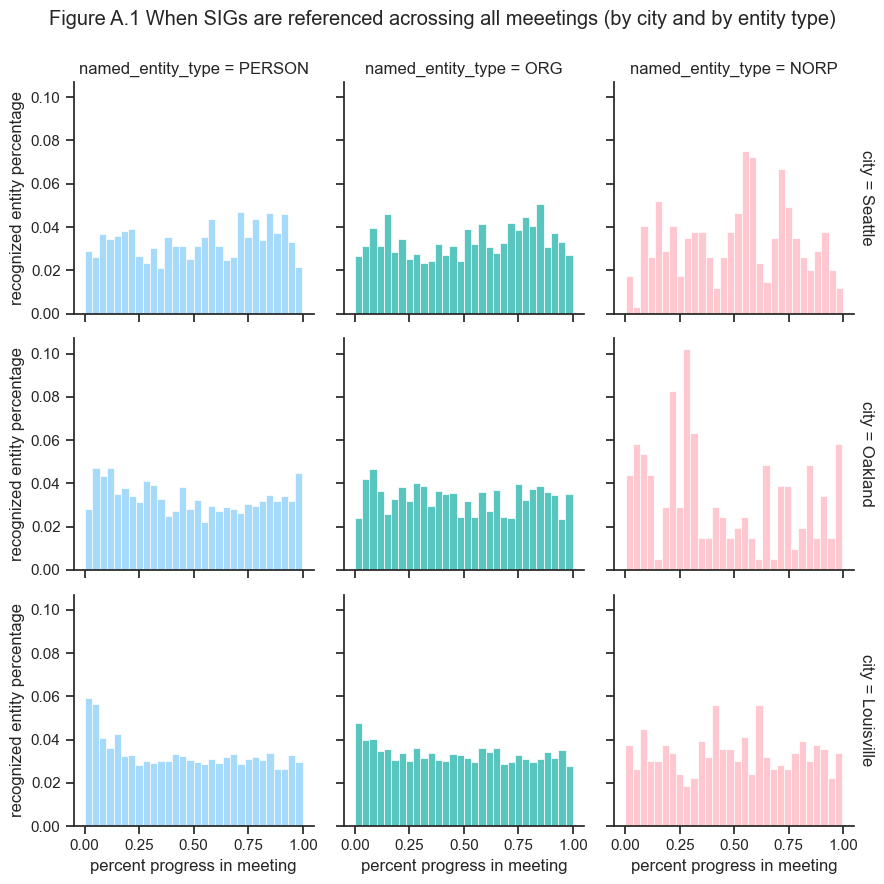

In [33]:
custom_palette = ["#87CEFA", "#20B2AA", "#FFB6C1"]

g = sns.FacetGrid(all_cities_df, row="city", col="named_entity_type", margin_titles=True, 
                  hue="named_entity_type", palette=custom_palette)
g.map_dataframe(sns.histplot, x="percentage", stat="proportion", bins=30)
_ = g.set_axis_labels("percent progress in meeting", "recognized entity percentage")
_ = g.fig.subplots_adjust(top=0.9)
_ = g.fig.suptitle("Figure A.1 When SIGs are referenced acrossing all meeetings (by city and by entity type)")

**Figure A.1 When SIGs are Referenced Across all Meetings:** Figure shows the percentage of recognized entities at a given percentage progress of the meeting. The named-entity types included are PERSON, ORG, and NORP and are plotted individually for each city. In Seattle, Oakland, and Louisville, the distribution of PEOPLE and ORG are relatively uniform. The distribution of NORP is multimodal or not uniform. 

### stacked histogram (for each city)

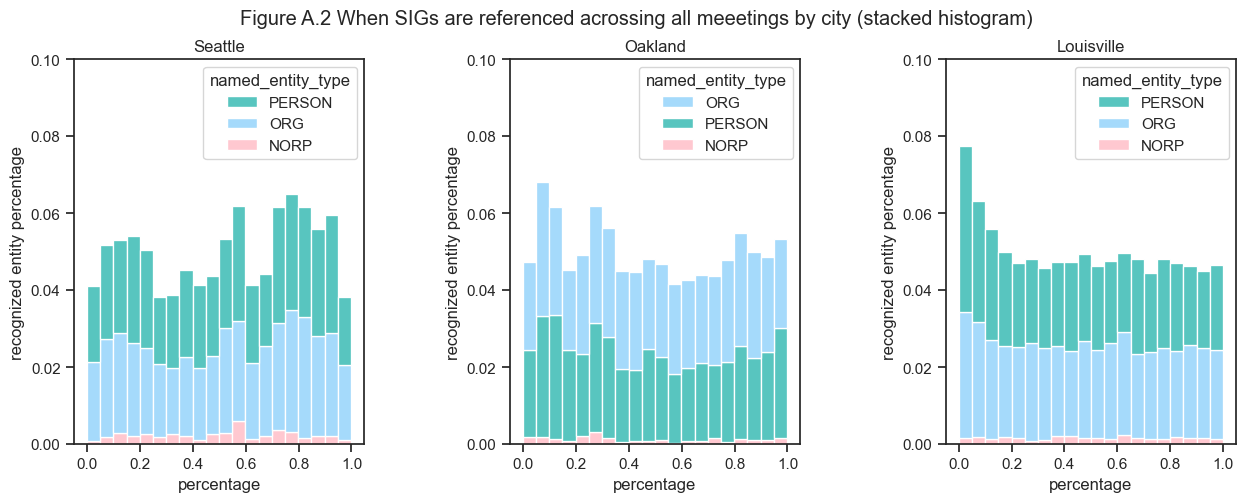

<Figure size 640x480 with 0 Axes>

In [32]:
fig, a = plt.subplots(1, 3, figsize=(15, 5))
_ = fig.subplots_adjust(wspace=0.5)

_ = f = plt.figure()


_ = sns.histplot(data=all_cities_df[all_cities_df['city'] == 'Seattle'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[0], palette=["#20B2AA", "#87CEFA", "#FFB6C1"])

_ = sns.histplot(data=all_cities_df[all_cities_df['city'] == 'Oakland'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[1], palette=["#87CEFA", "#20B2AA", "#FFB6C1"])

_ = sns.histplot(data=all_cities_df[all_cities_df['city'] == 'Louisville'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[2], palette=["#20B2AA", "#87CEFA", "#FFB6C1"])

a[0].set_ylabel("recognized entity percentage")
a[1].set_ylabel("recognized entity percentage")
a[2].set_ylabel("recognized entity percentage")

a[0].set_title("Seattle")
a[1].set_title("Oakland")
a[2].set_title("Louisville")

a[0].set(ylim=(0, 0.1))
a[1].set(ylim=(0, 0.1))
a[2].set(ylim=(0, 0.1))

_ = fig.suptitle("Figure A.2 When SIGs are referenced acrossing all meeetings by city (stacked histogram)")

**Figure A.2 When SIGs are Referenced Across all Meetings by city:** Figure shows the percentage of recognized entities for each entity type (PERSON, ORG, and NORP) at a given percentage progress of the meeting. For all cities, the percentage of entities that are classified as NORP entities are smaller compared to other entity categories like PERSON and ORG.

## What are the top entities mentioned on average across all meetings?

Count the number of times each recognized entity appeared.

Find the first 20 most frequently appeared words for all entity types/for each entity type.

Create a bar chart that displays the most frequently appeared words.

`filterlist` includes all entities that can be removed.

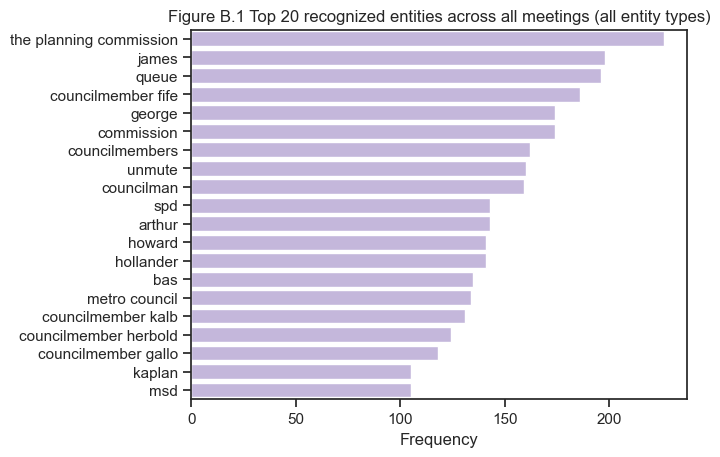

In [34]:
# Count the frequency of each recognized entity 
# and make a barplot of top 20 recognized entities across all meetings for all entity types.

word_count = {}

# a list of eneities that we want to filter out
filterlist = ['council', 'madam', 'committee', 'department']

for e in all_cities_df["entity"]:
    if str(e).lower() in word_count and str(e).lower() not in filterlist:
        word_count[str(e).lower()] += 1
    else:
        word_count[str(e).lower()] = 1

most_appeared = dict(nlargest(20, word_count.items(), key=lambda i: i[1]))

df = pd.DataFrame(list(most_appeared.items()), columns=['word', 'freq'])

ax = sns.barplot(x='freq', y='word', data=df, color="#C3B1E1")
_ = ax.set_ylabel("")
_ = ax.set_xlabel("Frequency")
_ = ax.set_title("Figure B.1 Top 20 recognized entities across all meetings (all entity types)")

**Figure B.1 Top 20 Recognized Entities Across all Meetings (All Entity Types):** Figure shows the frequency of all entity types mentioned during meetings from September to December 2022. 

Note: 8 of the 20 top recognized entities include the word “councilmember” or are entities mentioned as pleasantries. Though entities, these are not of value to the objective of the research. These entities will not be included in future figures. 

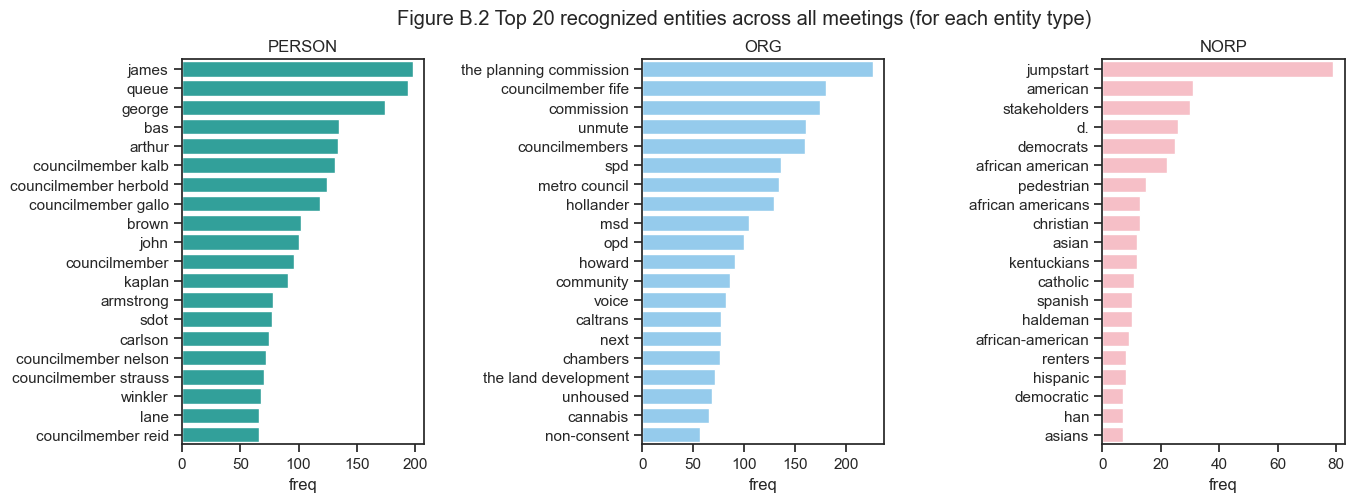

In [35]:
# Count the frequency of each recognized entity 
# and make a barplot of top 20 recognized entities across all meetings for each entity type.


# result_df stores top 20 entities mentioned on average across all meetings in all cities by entity type
result_df = pd.DataFrame([], columns=["word", "freq", "named_entity_type"])
biglist = []


for entity_type in all_cities_df['named_entity_type'].unique():
    word_count_for1type = {}
    all_cities_df_for1type = all_cities_df[all_cities_df['named_entity_type'] == entity_type]

    # a list of eneities that we want to filter out
    filterlist = ['council', 'madam', 'councilman', 'committee', 'department']

    for e in all_cities_df_for1type["entity"]:
        if str(e).lower() in word_count_for1type and str(e).lower() not in filterlist:
            word_count_for1type[str(e).lower()] += 1
        else:
            word_count_for1type[str(e).lower()] = 1
    
    most_appeared_for1type = dict(nlargest(20, word_count_for1type.items(), key=lambda i: i[1]))
    
    df_for1type = pd.DataFrame(list(most_appeared_for1type.items()))
    df_for1type["named_entity_type"] = entity_type

    
    biglist.append(df_for1type)

    
result_df = pd.concat(biglist).rename({0: "word", 1: "freq"}, axis=1).reset_index(drop=True)

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.9)


_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'PERSON'], ax=ax[0], color="#20B2AA")
_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'ORG'], ax=ax[1], color="#87CEFA")
_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'NORP'], ax=ax[2], color="#FFB6C1")

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].set_title("PERSON")
ax[1].set_title("ORG")
ax[2].set_title("NORP")

fig.suptitle("Figure B.2 Top 20 recognized entities across all meetings (for each entity type)")

plt.show()

**Figure B.2 Top 20 Recognized Entities Across all Meetings:** Figure shows the entities with the highest frequency of mentions across all meetings from September and December 2022. The named entity types of interest, PEOPLE, ORG, and NORP, are plotted individually. For PERSON, the top entities are “james”, “queue”, “george”. For ORG, the top entities are “the planning commission”, “councilmember fife”, “commision”. For NORP, the top three entities are “jumpstart”, "american", and “stakeholders”. As the data continues to be processed, the filter list will continue to expand to ensure that only relevant entities are considered in interpretation of data. 


## Filter frequent entities that are not meaningful

In [19]:
all_cities_df

,Unnamed: 0,session_id,sentence_index,named_entity_type,entity,city,percentage
0,0,76bba31aaf85,1,PERSON,Alex Pedersen,Seattle,0.001054
1,1,76bba31aaf85,7,PERSON,Councilmember Sawant,Seattle,0.007376
2,2,76bba31aaf85,13,PERSON,Greg Spotts,Seattle,0.013699
3,3,76bba31aaf85,13,ORG,Seattle transportation Department,Seattle,0.013699
4,4,76bba31aaf85,14,PERSON,Spotts,Seattle,0.014752
...,...,...,...,...,...,...,...
32073,16584,3b14573b464b,2272,NORP,Asian,Louisville,0.990842
32074,16585,3b14573b464b,2272,ORG,LBD,Louisville,0.990842
32075,16586,3b14573b464b,2282,ORG,Committee,Louisville,0.995203
32076,16587,3b14573b464b,2282,PERSON,Arthur,Louisville,0.995203


The original dataframe has 32078 rows. We created some lists of filter which contain some common titles, council members' names, as well as other frequent entities that we found in the graphs above that are not meaningful to our analysis.

In [20]:
# filter lists
filter_list = ['counc', 'city', 'committee', 'department', 'madam', 'admin', 'attorney', 'clerk', 'mayor', 'unmute', 'american', 'christian', 'asian', 'kentuckians', 'catholic', 'spanish', 'hispanic']
seattle_council_mem = ['Nelson', 'Herbold', 'Juarez', 'Lewis', 'Morales', 'Mosqueda', 'Pedersen', 'Sawant', 'Strauss']
oakland_council_mem = ['Thao', 'Bas', 'Gallo', 'Parker', 'Ruby', 'Kaplan', 'Fife', 'Jenkins', 'Reiskin', 'Kalb', 'Ramachandran', 'Reid', 'Reed']
louisville_council_mem = ['Maloney', 'Dickinson', 'Leh', 'Fahey', 'Most', 'Hamlington', 'Hoefner', 'Hollander']
exact_match = ['county', 'community']

When observing the dataframe, we found that entities can be referenced in many different ways. So we want to be very careful about deciding what to filter out. One example is 'county', usually identified by itself with one exception 'Jefferson county farm bureau', which is a Louisville interest group that offers benefits and services to local residents. We don't want to accidently filter these types of interest group out so we implemented different strategies on filtering the data: exact match, and substring match.

For entities that are more unique (e.g. council member names, titles, etc.), we can do a substring match to have a larger tolerance, as opposed to entities that are more general (including 'county', 'community', etc), we can implement an exact match on the entity column.

In [21]:
# exact match, no substring
filtered_df = all_cities_df[~all_cities_df["entity"].str.lower().isin(exact_match)]
filtered_df

,Unnamed: 0,session_id,sentence_index,named_entity_type,entity,city,percentage
0,0,76bba31aaf85,1,PERSON,Alex Pedersen,Seattle,0.001054
1,1,76bba31aaf85,7,PERSON,Councilmember Sawant,Seattle,0.007376
2,2,76bba31aaf85,13,PERSON,Greg Spotts,Seattle,0.013699
3,3,76bba31aaf85,13,ORG,Seattle transportation Department,Seattle,0.013699
4,4,76bba31aaf85,14,PERSON,Spotts,Seattle,0.014752
...,...,...,...,...,...,...,...
32073,16584,3b14573b464b,2272,NORP,Asian,Louisville,0.990842
32074,16585,3b14573b464b,2272,ORG,LBD,Louisville,0.990842
32075,16586,3b14573b464b,2282,ORG,Committee,Louisville,0.995203
32076,16587,3b14573b464b,2282,PERSON,Arthur,Louisville,0.995203


In [22]:
# filter by substring, case insensitive
filter_pattern = '|'.join(seattle_council_mem) +'|' + '|'.join(oakland_council_mem) +'|' + '|'.join(louisville_council_mem) + '|' + '|'.join(filter_list)
filtered_df = filtered_df[~filtered_df["entity"].str.lower().str.contains(filter_pattern, case=False, na=False)]
filtered_df

,Unnamed: 0,session_id,sentence_index,named_entity_type,entity,city,percentage
2,2,76bba31aaf85,13,PERSON,Greg Spotts,Seattle,0.013699
4,4,76bba31aaf85,14,PERSON,Spotts,Seattle,0.014752
5,5,76bba31aaf85,16,NORP,Slivers,Seattle,0.016860
7,7,76bba31aaf85,26,PERSON,Greg Spotts,Seattle,0.027397
9,9,76bba31aaf85,28,PERSON,Chamber,Seattle,0.029505
...,...,...,...,...,...,...,...
32071,16582,3b14573b464b,2270,ORG,Corrections,Louisville,0.989969
32072,16583,3b14573b464b,2270,ORG,Corrections Facility,Louisville,0.989969
32074,16585,3b14573b464b,2272,ORG,LBD,Louisville,0.990842
32076,16587,3b14573b464b,2282,PERSON,Arthur,Louisville,0.995203


After filtering, we identified 7190 common entities and brought down the number of rows from 32078 to 24888.

# Plots again

## A. When are Special Interest Groups (SIGs) referenced during meetings?

### histogram

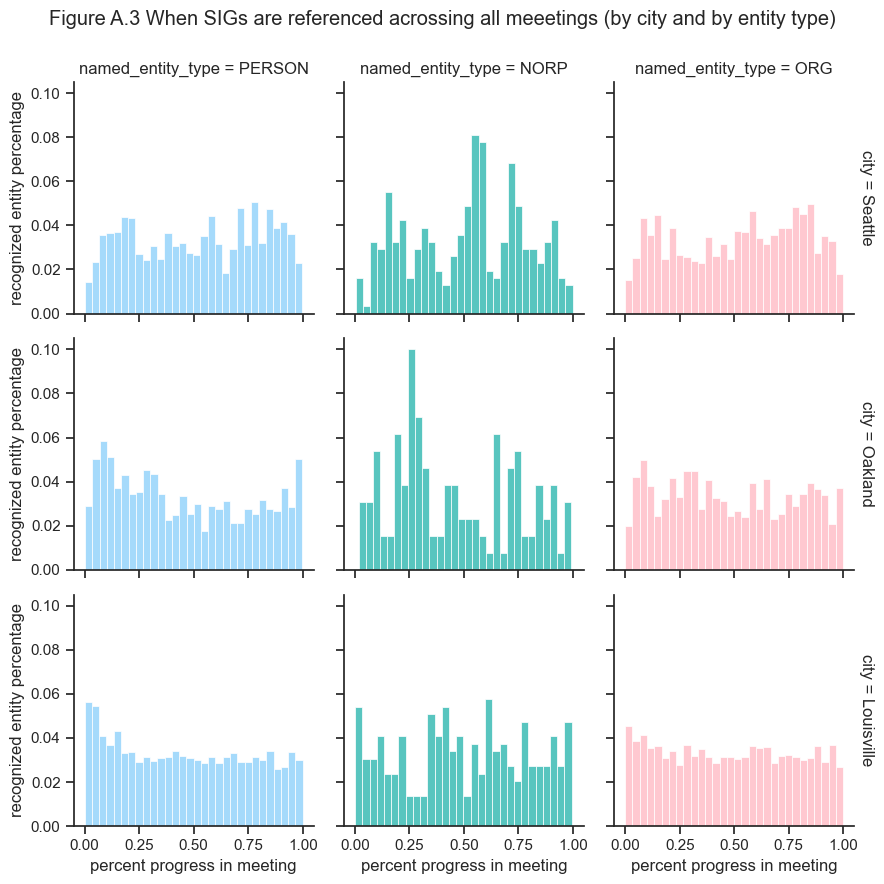

In [36]:
custom_palette = ["#87CEFA", "#20B2AA", "#FFB6C1"]

g = sns.FacetGrid(filtered_df, row="city", col="named_entity_type", margin_titles=True, 
                  hue="named_entity_type", palette=custom_palette)
g.map_dataframe(sns.histplot, x="percentage", stat="proportion", bins=30)
_ = g.set_axis_labels("percent progress in meeting", "recognized entity percentage")
_ = g.fig.subplots_adjust(top=0.9)
_ = g.fig.suptitle("Figure A.3 When SIGs are referenced acrossing all meeetings (by city and by entity type)")

**Figure A.3 When SIGs are Referenced Across all Meetings:** Figure shows the percentage of recognized entities at a given percentage progress of the meeting using the NER results dataset after filtering out unmeaningful entities. The named-entity types included are PERSON, ORG, and NORP and are plotted individually again for each city. With the filtered NER results, there has been some change in the distributions across the three cities for all entity types.

In [ ]:
filtered_df_seattle = filtered_df[filtered_df['city'] == 'Seattle']


### stacked histogram (for each city)

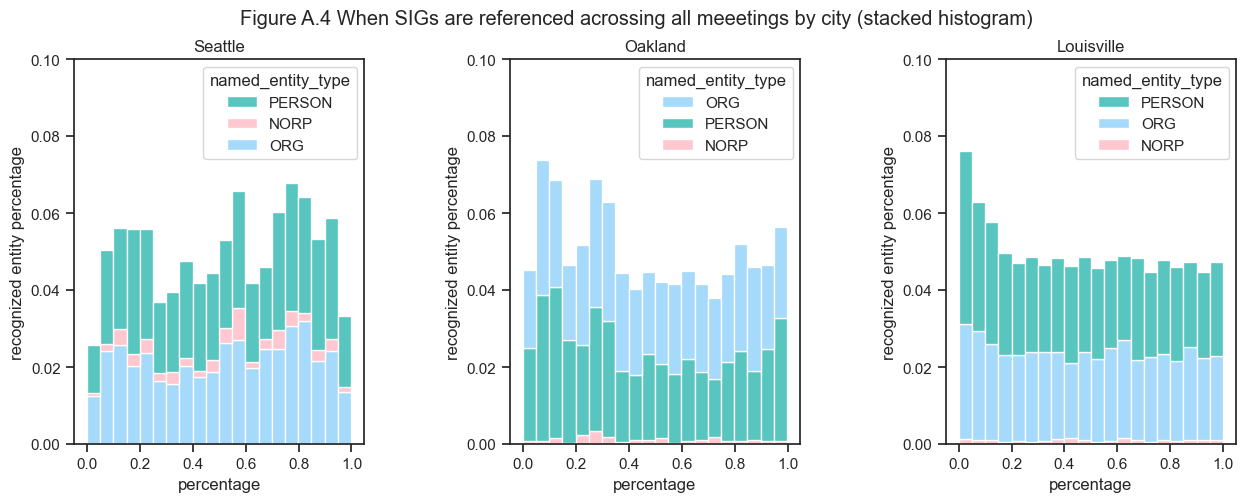

<Figure size 640x480 with 0 Axes>

In [37]:
fig, a = plt.subplots(1, 3, figsize=(15, 5))
_ = fig.subplots_adjust(wspace=0.5)

_ = f = plt.figure()

titanic = titanic[['survived', 'class', 'sex', 'age']]

filtered_df_seattle = filtered_df[filtered_df['city'] == 'Seattle']



_ = sns.histplot(data=filtered_df[filtered_df['city'] == 'Seattle'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[0], palette=["#20B2AA", "#FFB6C1", "#87CEFA"])

_ = sns.histplot(data=filtered_df[filtered_df['city'] == 'Oakland'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[1], palette=["#87CEFA", "#20B2AA", "#FFB6C1"])

_ = sns.histplot(data=filtered_df[filtered_df['city'] == 'Louisville'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[2], palette=["#20B2AA", "#87CEFA", "#FFB6C1"])

a[0].set_ylabel("recognized entity percentage")
a[1].set_ylabel("recognized entity percentage")
a[2].set_ylabel("recognized entity percentage")

a[0].set_title("Seattle")
a[1].set_title("Oakland")
a[2].set_title("Louisville")

a[0].set(ylim=(0, 0.1))
a[1].set(ylim=(0, 0.1))
a[2].set(ylim=(0, 0.1))

_ = fig.suptitle("Figure A.4 When SIGs are referenced acrossing all meeetings by city (stacked histogram)")

**Figure A.4 When SIGs are Referenced Across all Meetings by city:** Figure shows the percentage of recognized entities for each entity type (PERSON, ORG, and NORP) at a given percentage progress of the meeting. After filtering the unmeaningful entities, the percentage of entity type NORP are still smaller compared to other entity types like PERSON and ORG for all cities.

Text(0, 0.5, 'percentage')

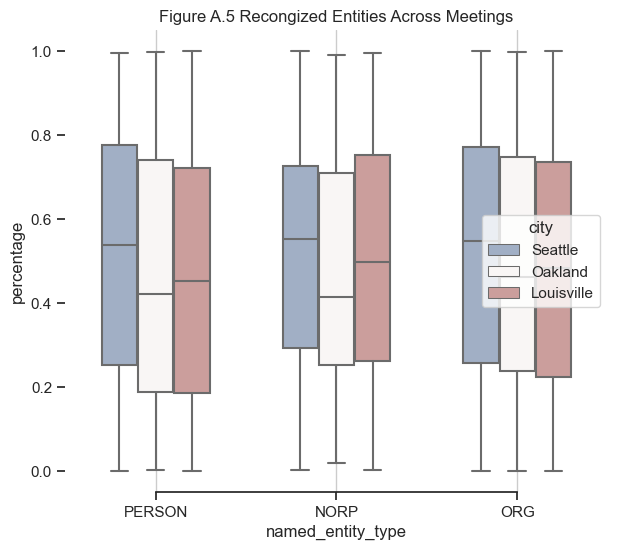

In [38]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")
sns.boxplot(x="named_entity_type", y="percentage", data= filtered_df,
            hue="city",whis=[0, 100], width=.6, palette="vlag")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
ax.set_title('Figure A.5 Recongized Entities Across Meetings')
ax.set_xlabel('named_entity_type')
ax.set_ylabel('percentage')

**Figure A.5 When SIGs are Referenced Across all Meetings - Boxplot:** Figure shows the percentage of recognized entities for each entity type (PERSON, ORG, and NORP) at a given percentage progress of the meeting. For all three cities, the majority PERSON, ORG, and NORP references occur during the mid-point of the meeting, between the 20th and 80th percentiles.

## B. What are the top entities mentioned on average across all meetings?

Count the number of times each recognized entity appeared.

Find the first 20 most frequently appeared words for all entity types/for each entity type.

Create a bar chart that displays the most frequently appeared words.

/var/folders/ny/lkzctf9d3fb_r19w5l8wlf8r0000gn/T/ipykernel_12541/123794716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["entity"] = filtered_df["entity"].map(str)


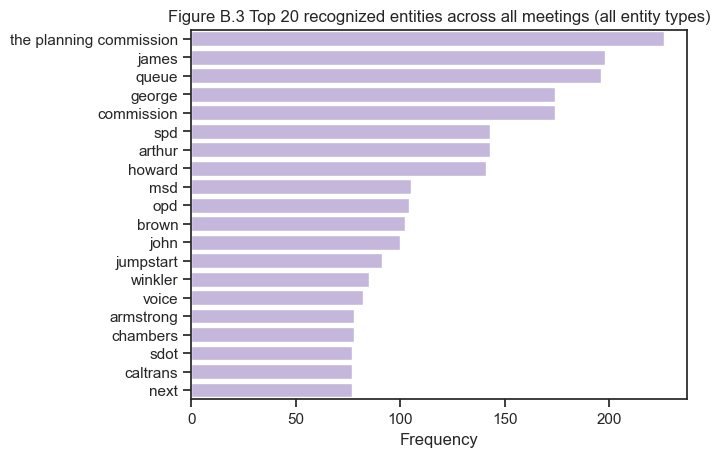

In [39]:
# Count the frequency of each recognized entity 
# and make a barplot of top 20 recognized entities across all meetings for all entity types.
filtered_df["entity"] = filtered_df["entity"].map(str)

word_count = {}

for e in filtered_df["entity"]:
    if e.lower() in word_count and e.lower() not in filterlist:
        word_count[e.lower()] += 1
    else:
        word_count[e.lower()] = 1

most_appeared = dict(nlargest(20, word_count.items(), key=lambda i: i[1]))

df = pd.DataFrame(list(most_appeared.items()), columns=['word', 'freq'])

ax = sns.barplot(x='freq', y='word', data=df, color="#C3B1E1")
_ = ax.set_ylabel("")
_ = ax.set_xlabel("Frequency")
_ = ax.set_title("Figure B.3 Top 20 recognized entities across all meetings (all entity types)")

**Figure B.3 Top 20 Recognized Entities Across all Meetings (All Entity Types):** Figure shows the frequency of all entity types mentioned during meetings from September to December 2022 using the filtered NER results data for all three cities.

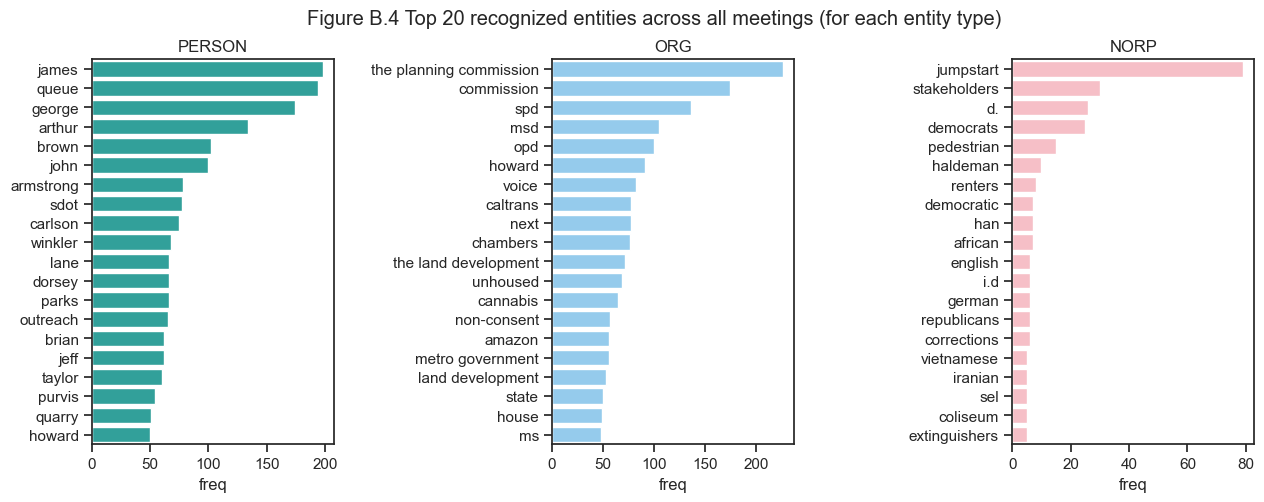

In [40]:
# Count the frequency of each recognized entity 
# and make a barplot of top 20 recognized entities across all meetings for each entity type.


# result_df stores top 20 entities mentioned on average across all meetings in all cities by entity type
result_df = pd.DataFrame([], columns=["word", "freq", "named_entity_type"])
biglist = []


for entity_type in filtered_df['named_entity_type'].unique():
    word_count_for1type = {}
    all_cities_df_for1type = filtered_df[filtered_df['named_entity_type'] == entity_type]

    # a list of eneities that we want to filter out
    filterlist = ['council', 'madam', 'councilman', 'committee', 'department']

    for e in all_cities_df_for1type["entity"]:
        if e.lower() in word_count_for1type and e.lower() not in filterlist:
            word_count_for1type[e.lower()] += 1
        else:
            word_count_for1type[e.lower()] = 1
    
    most_appeared_for1type = dict(nlargest(20, word_count_for1type.items(), key=lambda i: i[1]))
    
    df_for1type = pd.DataFrame(list(most_appeared_for1type.items()))
    df_for1type["named_entity_type"] = entity_type

    
    biglist.append(df_for1type)

    
result_df = pd.concat(biglist).rename({0: "word", 1: "freq"}, axis=1).reset_index(drop=True)

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.9)


_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'PERSON'], ax=ax[0], color="#20B2AA")
_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'ORG'], ax=ax[1], color="#87CEFA")
_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'NORP'], ax=ax[2], color="#FFB6C1")

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].set_title("PERSON")
ax[1].set_title("ORG")
ax[2].set_title("NORP")

fig.suptitle("Figure B.4 Top 20 recognized entities across all meetings (for each entity type)")

plt.show()

**Figure B.4 Top 20 Recognized Entities Across all Meetings:** Figure shows the entities with the highest frequency of mentions across all meetings from September and December 2022 using the filtered NER results data for each city. The named entity types of interest, PEOPLE, ORG, and NORP, are plotted individually. For PERSON, the top entities are “james”, “queue”, “george”. For ORG, the top entities are “the planning commission”, “commision”, and “spd”. For NORP, the top three entities are “jumpstart”, “stakeholders”, and “d,”.
